In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



In [11]:
data = 'malimg_dataset/malimg_paper_dataset_imgs'

In [13]:
familias = ImageDataGenerator().flow_from_directory(directory=data, target_size=(64,64), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [14]:
familias.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [15]:
def plot_images(image_batch, label_batch, class_indices, num_images=50):
    fig, axes = plt.subplots(10, 5, figsize=(20, 40))  
    axes = axes.flatten()
    for img, label, ax in zip(image_batch, label_batch, axes):
        ax.imshow(img)
        ax.axis('Off')
        class_label = class_indices[np.argmax(label)]
        ax.set_title(class_label)
    plt.tight_layout()
    plt.show()


In [17]:
images, labels = next(familias)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

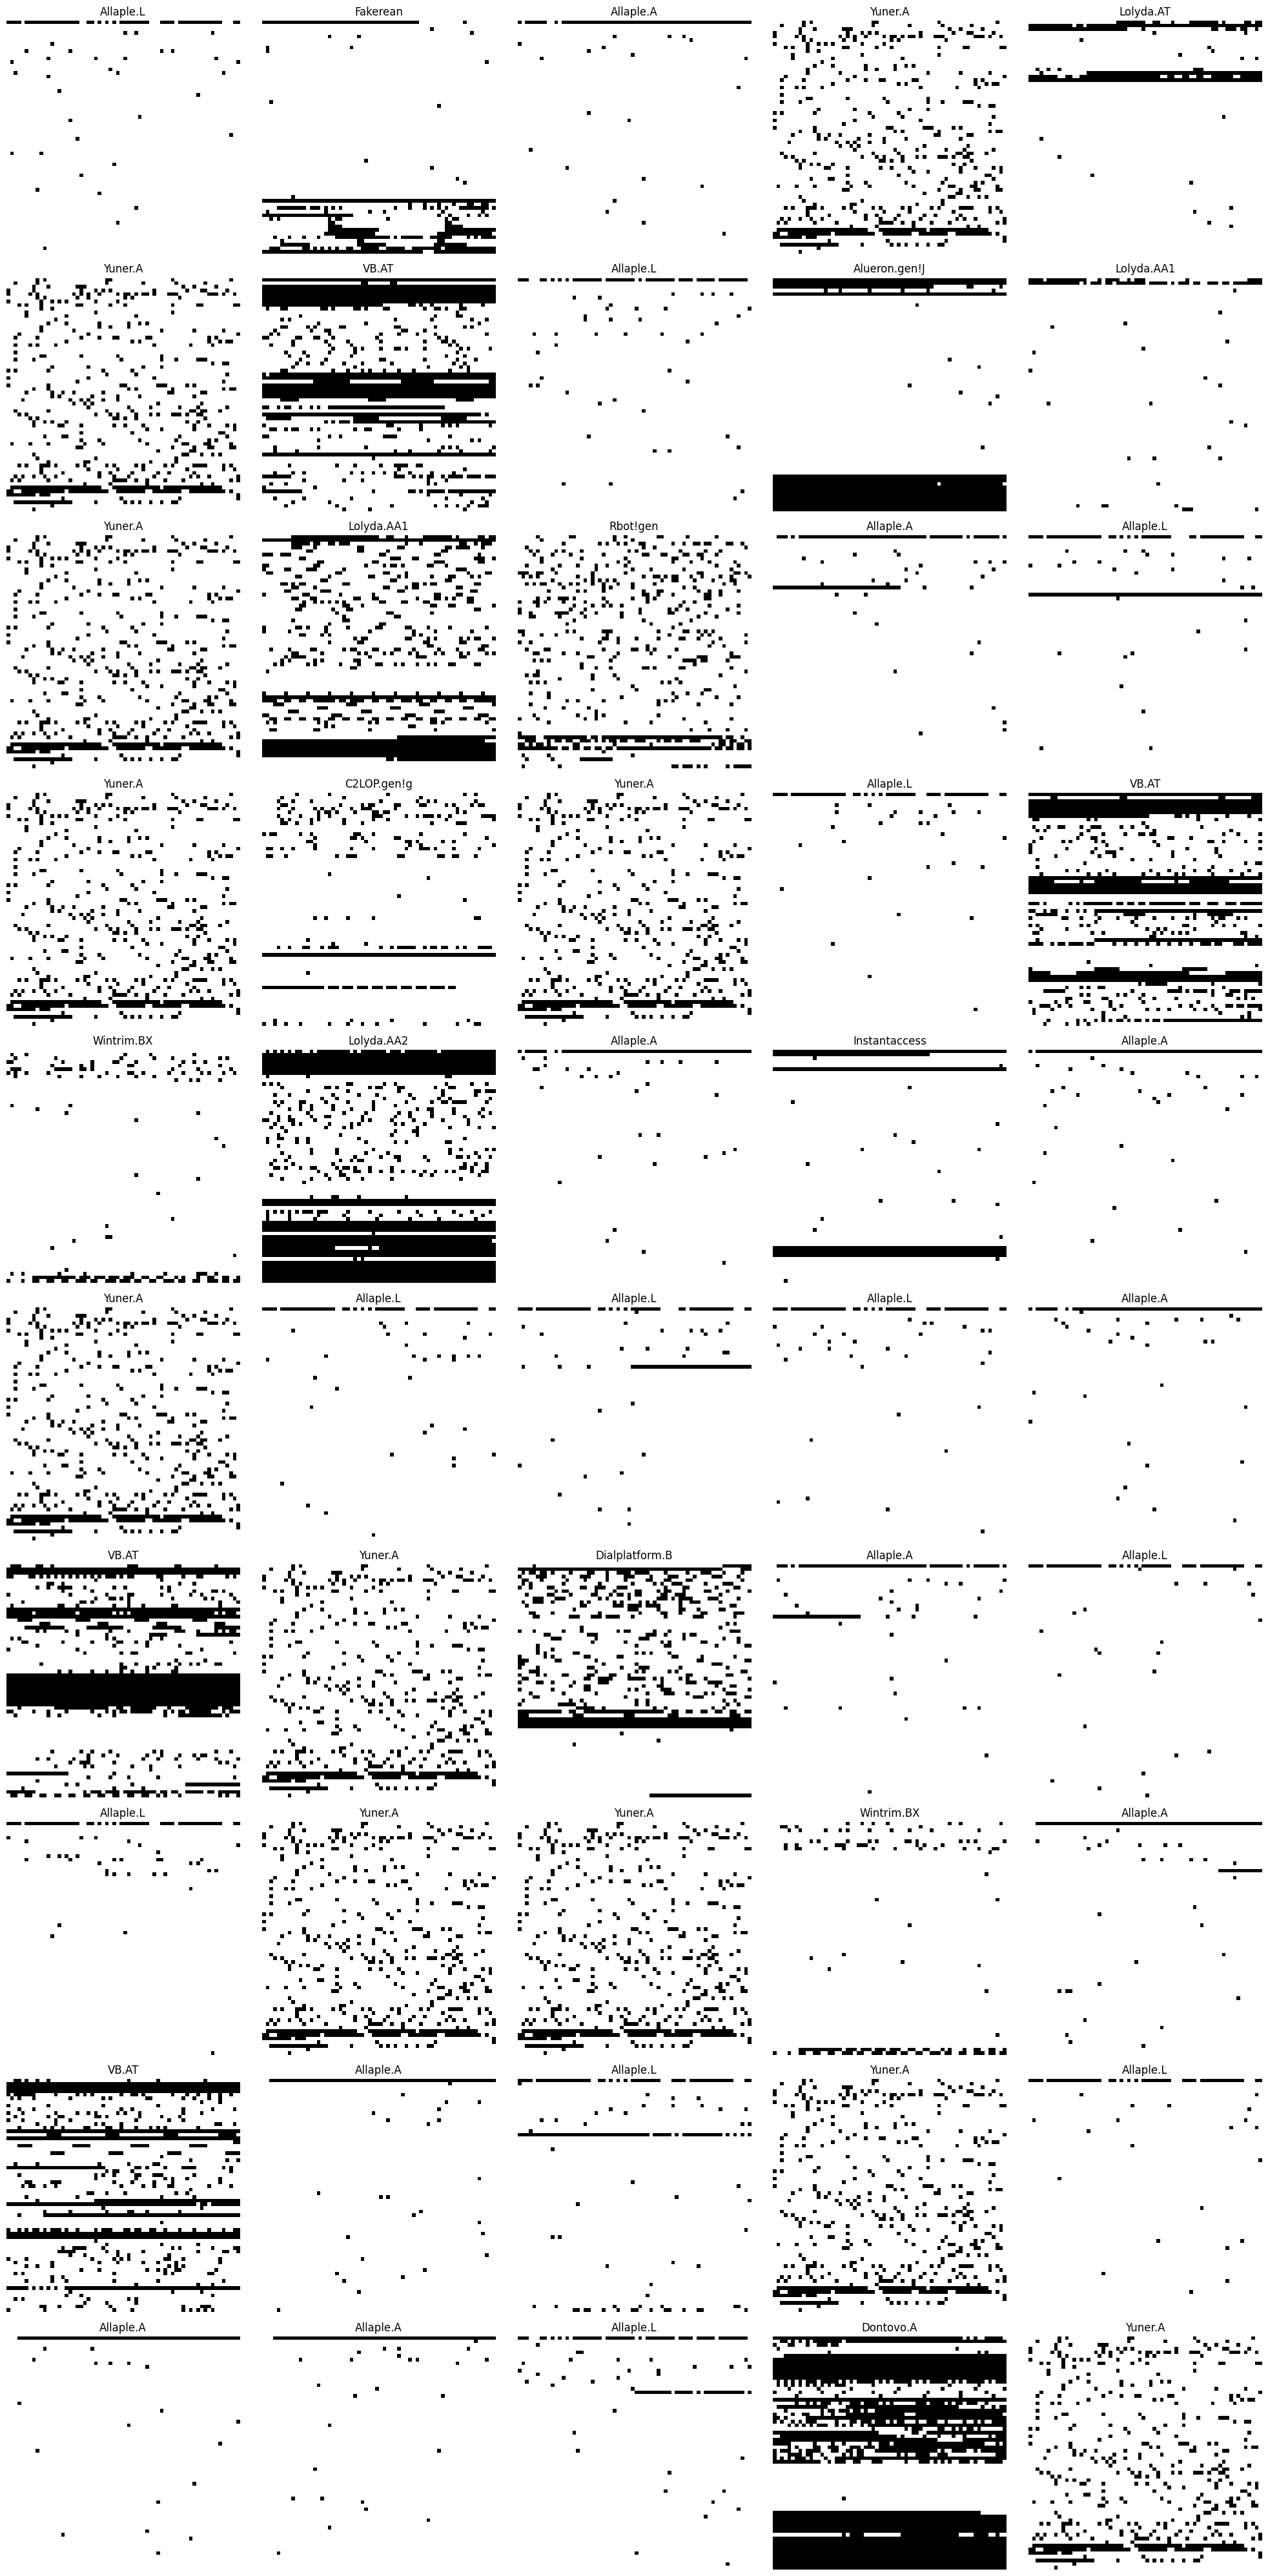

In [18]:
plot_images(images, labels, list(familias.class_indices.keys()))

In [19]:


datagen = ImageDataGenerator(rescale=1./255)

image_generator = datagen.flow_from_directory(
    directory=data,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 9339 images belonging to 25 classes.


In [24]:
import numpy as np


all_images = []
all_labels = []


class_labels = image_generator.class_indices
image_count_per_class = {class_name: 0 for class_name in class_labels.keys()}


for _ in range((image_generator.samples // image_generator.batch_size) + 1):
    imgs, labels = next(image_generator)
    all_images.append(imgs)
    all_labels.append(labels)


    for label_array in labels:
        class_name = list(class_labels.keys())[np.argmax(label_array)]
        image_count_per_class[class_name] += 1

all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

all_images = all_images[:image_generator.samples]
all_labels = all_labels[:image_generator.samples]


print("Image count per malware family:")
for class_name, count in image_count_per_class.items():
    print(f"{class_name}: {count}")


Image count per malware family:
Adialer.C: 122
Agent.FYI: 116
Allaple.A: 2949
Allaple.L: 1591
Alueron.gen!J: 198
Autorun.K: 106
C2LOP.P: 146
C2LOP.gen!g: 200
Dialplatform.B: 177
Dontovo.A: 162
Fakerean: 381
Instantaccess: 431
Lolyda.AA1: 213
Lolyda.AA2: 184
Lolyda.AA3: 123
Lolyda.AT: 159
Malex.gen!J: 136
Obfuscator.AD: 142
Rbot!gen: 158
Skintrim.N: 80
Swizzor.gen!E: 128
Swizzor.gen!I: 132
VB.AT: 408
Wintrim.BX: 97
Yuner.A: 800


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def model_new(input_shape):
    model = Sequential([
        Conv2D(32, kernel_size=3, activation="relu", input_shape=input_shape, kernel_initializer='he_uniform'),
        BatchNormalization(),
        MaxPooling2D(2),
        Dropout(0.2),  
        Conv2D(64, kernel_size=3, activation="relu", kernel_initializer='he_uniform'),
        BatchNormalization(),
        MaxPooling2D(2),
        Dropout(0.3),  
        Flatten(),
        Dense(128, activation="relu", kernel_initializer='he_uniform'),
        Dropout(0.4),  
        Dense(25, activation="softmax")  
    ])

    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [33]:
input_shape = (64, 64, 3)

In [36]:


model = model_new(input_shape)

model.fit(X_train, y_train, epochs=5, batch_size=45, validation_split=0.2, verbose=1)

model.save("model-final.h5")